In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from category_encoders import TargetEncoder
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [248]:
df = pd.read_csv("C:\\Users\\antho\\Documents\\Data Science\\Data\\mobile.csv")

In [249]:
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1767,1136,1,1.6,0,15,0,32,0.5,150,6,...,961,1030,3210,10,3,8,1,1,1,3
353,1182,0,0.5,0,7,1,8,0.5,138,8,...,275,986,2563,19,17,19,1,0,0,2
66,1358,1,0.5,0,11,1,36,0.3,155,4,...,1565,1858,3068,9,4,4,1,1,0,3
1141,1923,0,1.3,0,3,0,24,1.0,86,4,...,874,1264,2479,9,2,15,1,1,0,2
1259,1796,0,1.6,1,5,0,7,0.1,101,4,...,667,798,1642,9,4,3,0,1,1,1


In [5]:
df.shape

(2000, 21)

In [250]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [251]:
df.columns = ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam', '4g',
              'internal_memory', 'depth', 'weight', 'cores', 'rear_cam', 'pixel_height',
              'pixel_width', 'ram', 'screen_height', 'screen_width', 'talk_time', '3g',
              'touch_screen', 'wifi', 'price_range']

In [40]:
df.sample(5)

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4g,internal_memory,depth,weight,cores,...,pixel_height,pixel_width,ram,screen_height,screen_width,talk_time,3g,touch_screen,wifi,price_range
618,843,0,1.8,1,0,0,16,0.1,166,5,...,981,1096,3673,12,1,20,1,0,1,3
1866,907,1,2.6,1,7,0,44,0.2,160,3,...,144,896,3911,13,6,8,0,0,0,3
1923,1056,1,2.1,1,8,1,37,0.7,101,3,...,914,979,2651,15,5,3,1,1,1,2
838,854,0,0.5,0,2,0,30,0.5,125,8,...,518,1152,2889,5,2,11,0,0,1,2
1052,547,0,1.9,1,1,0,37,0.4,154,5,...,371,541,2705,17,3,10,1,1,0,1


In [41]:
df.isnull().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_cam          0
4g                 0
internal_memory    0
depth              0
weight             0
cores              0
rear_cam           0
pixel_height       0
pixel_width        0
ram                0
screen_height      0
screen_width       0
talk_time          0
3g                 0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [42]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4g,internal_memory,depth,weight,cores,...,pixel_height,pixel_width,ram,screen_height,screen_width,talk_time,3g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [43]:
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1, 'Correlation ')

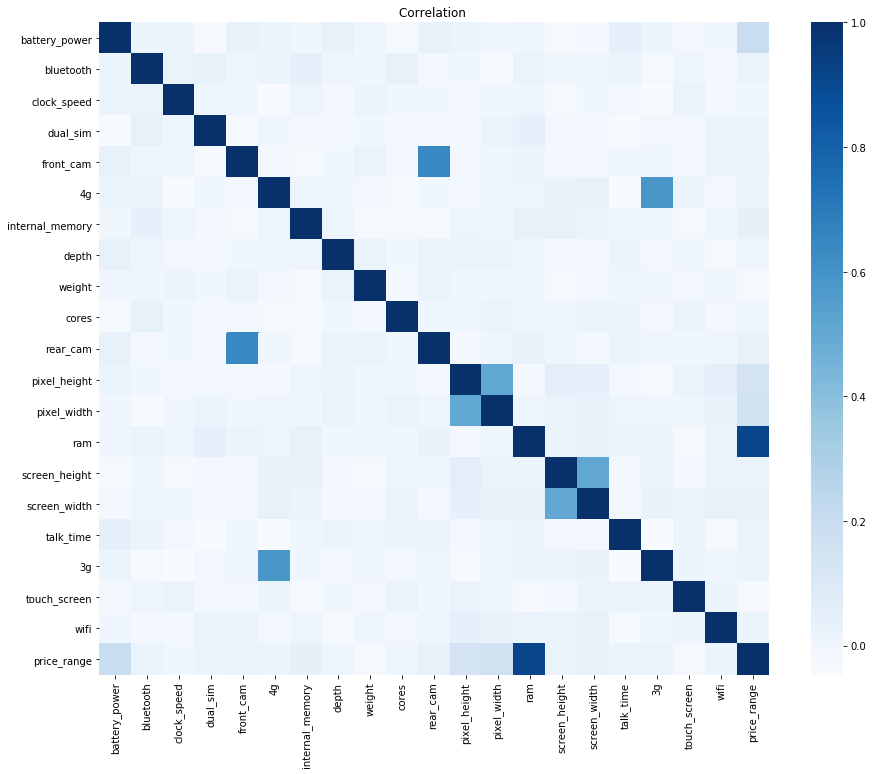

In [81]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Blues')
r.set_title("Correlation ")

# Correlation: RAM, 

In [246]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range        1.000000
ram                0.917046
battery_power      0.200723
pixel_width        0.165818
pixel_height       0.148858
internal_memory    0.044435
screen_width       0.038711
rear_cam           0.033599
3g                 0.023611
screen_height      0.022986
front_cam          0.021998
talk_time          0.021859
bluetooth          0.020573
wifi               0.018785
dual_sim           0.017444
4g                 0.014772
cores              0.004399
depth              0.000853
clock_speed       -0.006606
weight            -0.030302
touch_screen      -0.030411
Name: price_range, dtype: float64

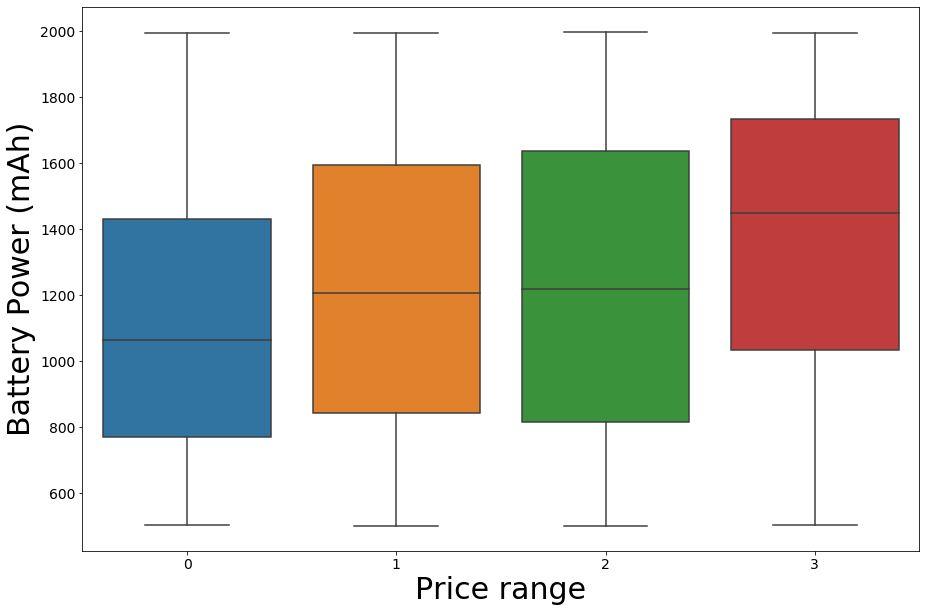

In [55]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="price_range", y="battery_power", data=df)
plt.ylabel('Battery Power (mAh)', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('Price range', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

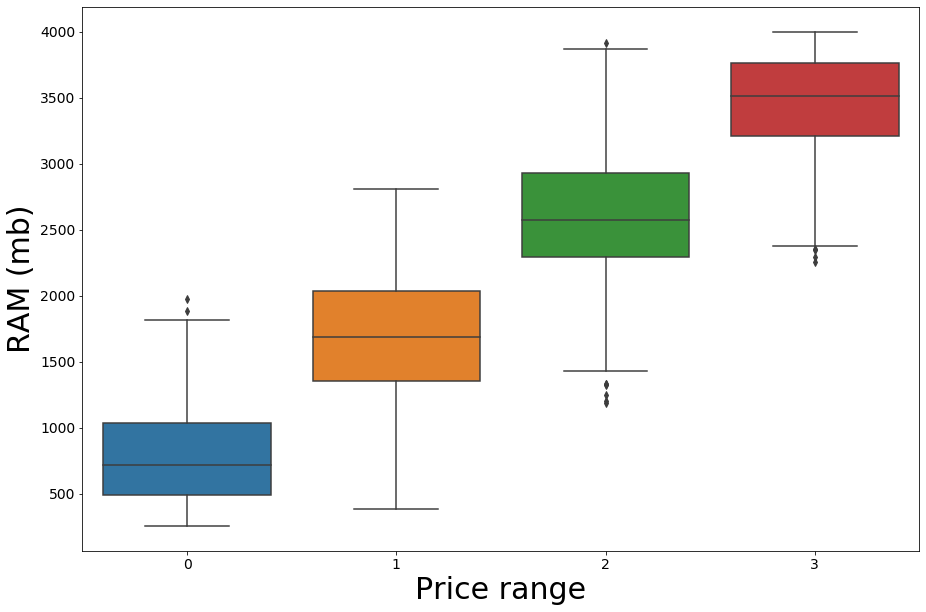

In [61]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="price_range", y="ram", data=df)
plt.ylabel('RAM (mb)', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('Price range', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

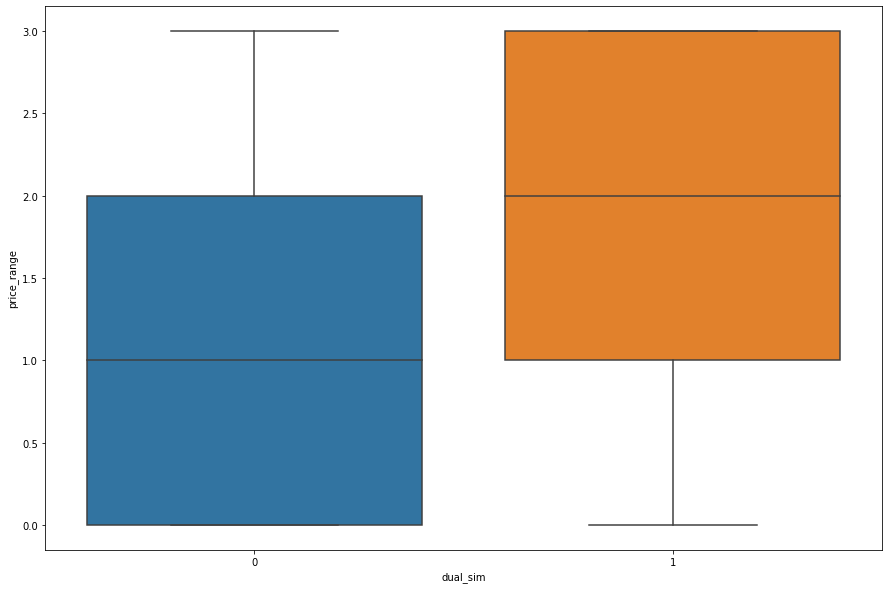

In [53]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='dual_sim', y='price_range', data=df)
plt.show()

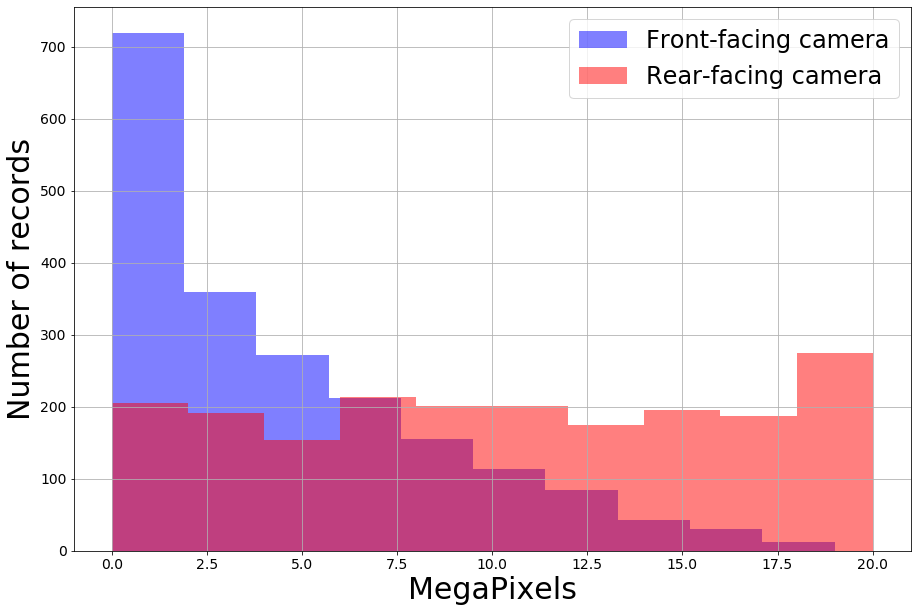

In [82]:
plt.figure(figsize=(15,10))
df['front_cam'].hist(alpha=0.5, color='blue', label='Front-facing camera')
df['rear_cam'].hist(alpha=0.5, color='red', label='Rear-facing camera')
plt.legend(prop={'size': 24})
plt.ylabel('Number of records', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('MegaPixels', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

In [15]:
df.corr().sort_values(by='price_range')

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4g,internal_memory,depth,weight,cores,...,pixel_height,pixel_width,ram,screen_height,screen_width,talk_time,3g,touch_screen,wifi,price_range
touch_screen,-0.010516,0.010061,0.019756,-0.017117,-0.014828,0.016758,-0.026999,-0.002638,-0.014368,0.023774,...,0.021891,-0.001628,-0.030455,-0.020023,0.012720,0.017196,0.013917,1.000000,0.011917,-0.030411
weight,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
depth,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399
4g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
wifi,-0.008343,-0.021863,-0.024471,0.022740,0.020085,-0.017620,0.006993,-0.028353,-0.000409,-0.009964,...,0.051824,0.030319,0.022669,0.025929,0.035423,-0.029504,0.004316,0.011917,1.000000,0.018785
bluetooth,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
talk_time,0.052510,0.013934,-0.011432,-0.039404,-0.006829,-0.046628,-0.002790,0.017003,0.006209,0.013148,...,-0.010645,0.006720,0.010820,-0.017335,-0.022821,1.000000,-0.042688,0.017196,-0.029504,0.021859


In [252]:
X = df.drop(['price_range', '3g'], axis=1)
features = X.columns
y = df['price_range']

In [253]:
X = preprocessing.scale(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [198]:
# Build Model
dt = DecisionTreeClassifier(random_state=1)

# Fit Model
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

#y_pred_train = dt.predict(X_train)
#predictions = dt.predict(X_test)
#print(mean_absolute_error(y_test, predictions))

Accuracy:  0.8575


In [20]:
dt.score(X_test,y_test)

0.8575

Text(0.5, 0, 'Relative Importance')

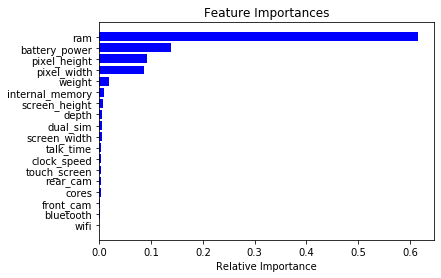

In [30]:
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [31]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[83  9  0  0]
 [ 7 84  5  0]
 [ 0 14 83  9]
 [ 0  0 13 93]]

Normalized confusion matrix:
[0.90217391 0.09782609 0.         0.        ]
[0.07291667 0.875      0.05208333 0.        ]
[0.         0.13207547 0.78301887 0.08490566]
[0.         0.         0.12264151 0.87735849]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91        92
           1       0.79      0.88      0.83        96
           2       0.82      0.78      0.80       106
           3       0.91      0.88      0.89       106

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



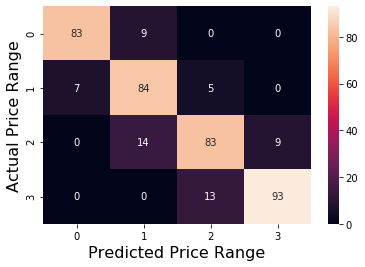

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
plt.ylabel('Actual Price Range', fontsize=16)
plt.xlabel('Predicted Price Range', fontsize=16)
print(classification_report(y_test, y_pred))

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    dtr = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    dtr.fit(X_train, y_train)
    preds_test = dtr.predict(X_test)
    mae = mean_absolute_error(y_test, preds_test)
    return(mae)

In [22]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [77]:
# Build Model
forest = RandomForestClassifier(n_estimators=100, max_depth=None)

# Fit Model
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.865


In [50]:
forest.score(X_test, y_test)

0.86

Text(0.5, 0, 'Relative Importance')

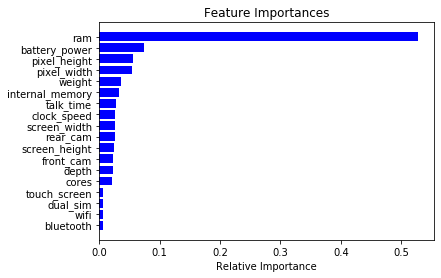

In [26]:
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [27]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[85  7  0  0]
 [ 8 80  8  0]
 [ 0 14 87  5]
 [ 0  0 12 94]]

Normalized confusion matrix:
[0.92391304 0.07608696 0.         0.        ]
[0.08333333 0.83333333 0.08333333 0.        ]
[0.         0.13207547 0.82075472 0.04716981]
[0.         0.         0.11320755 0.88679245]


              precision    recall  f1-score   support

           0       0.91      0.92      0.92        92
           1       0.79      0.83      0.81        96
           2       0.81      0.82      0.82       106
           3       0.95      0.89      0.92       106

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.86      0.87       400



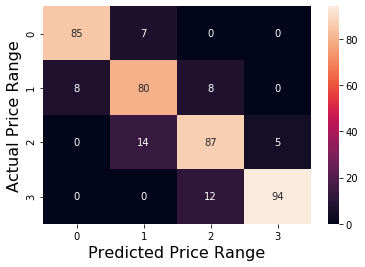

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
plt.ylabel('Actual Price Range', fontsize=16)
plt.xlabel('Predicted Price Range', fontsize=16)
print(classification_report(y_test, y_pred))

In [104]:
# Build Model
ada = AdaBoostClassifier()

# Fit Model
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.685


In [105]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[29 63  0  0]
 [ 5 81 10  0]
 [ 0 13 80 13]
 [ 0  0 22 84]]

Normalized confusion matrix:
[0.31521739 0.68478261 0.         0.        ]
[0.05208333 0.84375    0.10416667 0.        ]
[0.         0.12264151 0.75471698 0.12264151]
[0.         0.         0.20754717 0.79245283]


              precision    recall  f1-score   support

           0       0.85      0.32      0.46        92
           1       0.52      0.84      0.64        96
           2       0.71      0.75      0.73       106
           3       0.87      0.79      0.83       106

    accuracy                           0.69       400
   macro avg       0.74      0.68      0.67       400
weighted avg       0.74      0.69      0.67       400



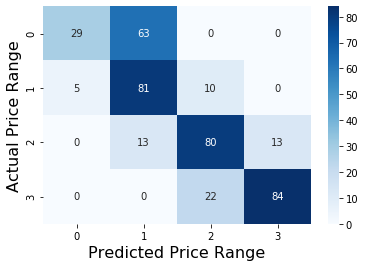

In [106]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "Blues", annot=True,fmt="d");
plt.ylabel('Actual Price Range', fontsize=16)
plt.xlabel('Predicted Price Range', fontsize=16)
print(classification_report(y_test, y_pred))

In [255]:
# Build Model
xgb = XGBClassifier(max_depth=6)

# Fit Model
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8975


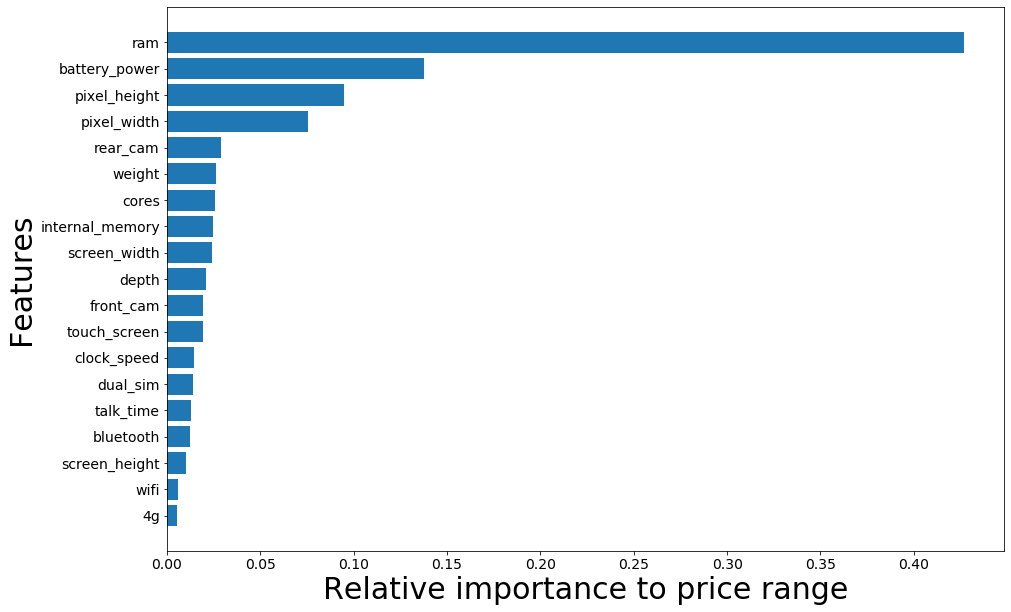

In [256]:
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
#plt.title('Feature Importances', fontsize=50)
plt.barh(range(len(indices)), importances[indices])
plt.ylabel('Features', fontsize=30)
plt.yticks(range(len(indices)), features[indices], fontsize=14)
plt.xlabel('Relative importance to price range', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

In [236]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")

# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[84  8  0  0]
 [ 3 90  3  0]
 [ 0 12 88  6]
 [ 0  0  9 97]]

Normalized confusion matrix:
[0.91304348 0.08695652 0.         0.        ]
[0.03125 0.9375  0.03125 0.     ]
[0.         0.11320755 0.83018868 0.05660377]
[0.         0.         0.08490566 0.91509434]


              precision    recall  f1-score   support

           0       0.97      0.91      0.94        92
           1       0.82      0.94      0.87        96
           2       0.88      0.83      0.85       106
           3       0.94      0.92      0.93       106

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



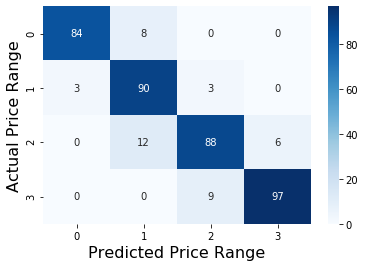

In [237]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "Blues", annot=True,fmt="d");
plt.ylabel('Actual Price Range', fontsize=16)
plt.xlabel('Predicted Price Range', fontsize=16)
print(classification_report(y_test, y_pred))

In [278]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(xgb, threshold=0.015)
sfm.fit(X_train, y_train)

X_train_1 = sfm.transform(X_train)
X_test_1 = sfm.transform(X_test)

In [235]:
xgb.fit(X_train_1, y_train)
pre = xgb.predict(X_test_1)
accuracy = metrics.accuracy_score(y_test, pre)
print("Accuracy: ", accuracy)

Accuracy:  0.905


              precision    recall  f1-score   support

           0       0.97      0.92      0.94        92
           1       0.83      0.94      0.88        96
           2       0.89      0.84      0.86       106
           3       0.95      0.92      0.94       106

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



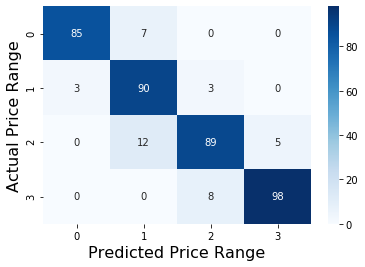

In [239]:
cm = confusion_matrix(y_test, pre)
sns.heatmap(cm, cmap = "Blues", annot=True,fmt="d");
plt.ylabel('Actual Price Range', fontsize=16)
plt.xlabel('Predicted Price Range', fontsize=16)
print(classification_report(y_test, pre))

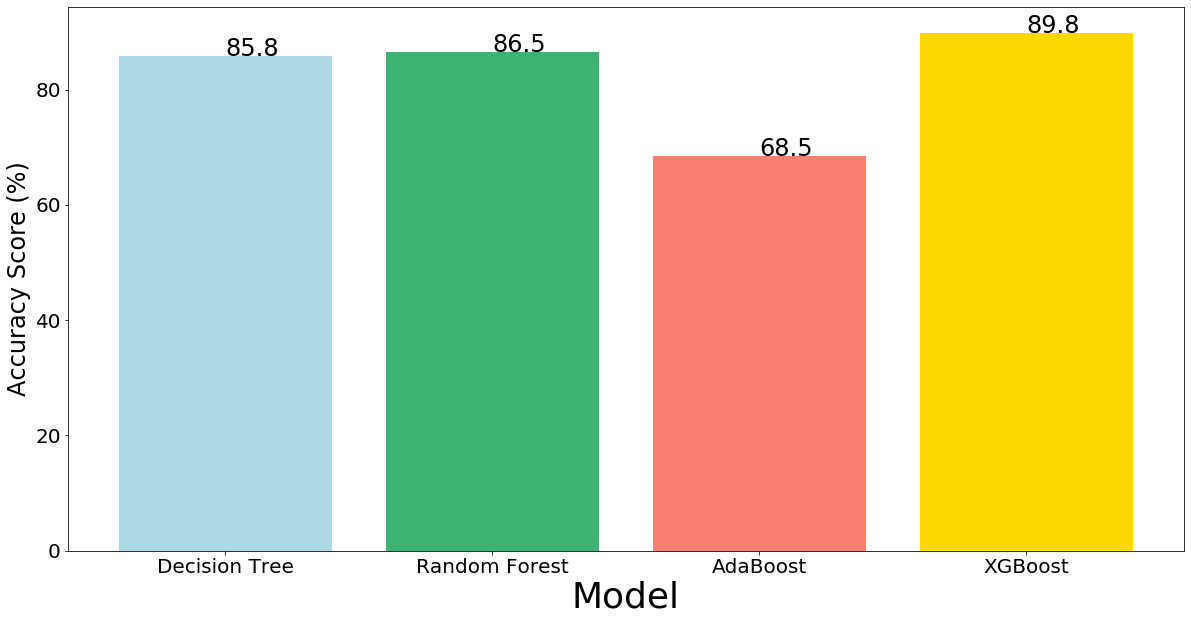

In [277]:
plt.figure(figsize = (20,10))
label = ['Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
accuracy = [85.8, 86.5, 68.5, 89.8]

plt.bar(label, accuracy, color=['lightblue', 'mediumseagreen', 'salmon','gold'])
for index, value in enumerate(accuracy):
    plt.text(index, value, str(value), fontsize=24)
plt.xlabel('Model', fontsize=36)
plt.xticks(fontsize=20)
plt.ylabel('Accuracy Score (%)', fontsize=24)
plt.yticks(fontsize=20)
plt.show()


#x = ["A", "B", "C", "D"]
#y = [1, 2, 3, 4]
#plt.barh(x, y)

#for index, value in enumerate(y):
#    plt.text(value, index, str(value))